In [1]:
import numpy as np

In [4]:
url = 'https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv'

# importando los datos de las naranjas
datosNaranjas = np.loadtxt(url,delimiter=',',usecols=np.arange(1,6,1), skiprows=1, max_rows=5000)

datosNaranjas.shape
# la primer columna corresponde a diámetro, la segunda a peso, y las otras tres se basan en la coloración rgb

(5000, 5)

In [5]:
# importando datos de Toronjas y verificando dimensión
datosToronjas = np.loadtxt(url,delimiter=',',usecols=np.arange(1,6,1), skiprows=5001, max_rows=5000)

datosToronjas.shape

(5000, 5)

In [6]:
datosNaranjas

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 12.55, 218.07, 143.  ,  77.  ,   4.  ],
       [ 12.75, 230.13, 159.  ,  87.  ,   5.  ],
       [ 12.87, 231.09, 158.  ,  86.  ,  17.  ]])

In [7]:
# obteniendo diametro y peso de naranjas y toronjas en distintos arrays
diametroNaranjas = datosNaranjas[:,0]
pesoNaranjas = datosNaranjas[:,1]
diametroToronjas = datosToronjas[:,0]
pesoToronjas = datosToronjas[:,1]

In [10]:
diametroNaranjas.shape, diametroToronjas.shape, pesoNaranjas.shape, pesoToronjas.shape

((5000,), (5000,), (5000,), (5000,))

In [11]:
import matplotlib.pyplot as plt

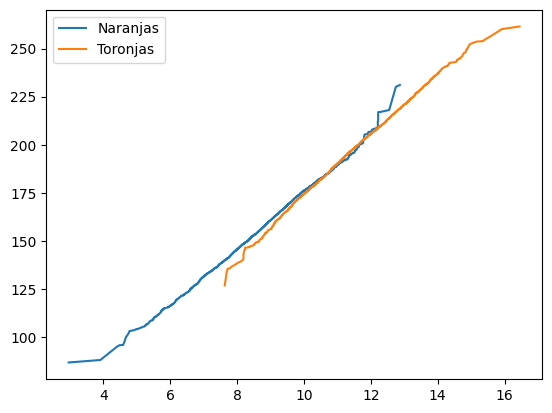

In [12]:
plt.plot(diametroNaranjas, pesoNaranjas)
plt.plot(diametroToronjas,pesoToronjas)
plt.legend(['Naranjas','Toronjas'])

In [16]:
# nos aseguramos que no haya ningún valor nulo
print(np.sum(np.isnan(diametroNaranjas)))
print(np.sum(np.isnan(diametroToronjas)))
print(np.sum(np.isnan(pesoToronjas)))
print(np.sum(np.isnan(pesoNaranjas)))

0
0
0
0


Con el proyecto de las naranjas/toronjas, ahora debemos calcular el coeficiente angular utilizando la generación de números aleatorios. Supongamos que ya conocemos el valor de b y que este es igual a 17.

Pidiendo una ayuda a Luri, con que me lo explique de otra manera, entendemos que:
"En este contexto, el coeficiente angular es un valor que estamos ajustando aleatoriamente para encontrar la mejor línea que se ajuste a nuestros datos de naranjas/toronjas. Imagina que tienes una recta y puedes cambiar su inclinación (ese es el coeficiente angular) para que se acerque lo más posible a los puntos que representan tus datos. ¡Espero que esto aclare tu duda!"

Vamos a empezar comparando las dimensiones promedio de ambas

In [17]:
print(f'Los diámetros promedios son de:\nNaranja:{np.mean(diametroNaranjas)}\nToronja:{np.mean(diametroToronjas)}')

Los diámetros promedios son de:
Naranja:8.474423999999999
Toronja:11.476946


In [18]:
print(f'Los pesos promedios son de:\nNaranja:{np.mean(pesoNaranjas)}\nToronja:{np.mean(pesoToronjas)}')   

Los pesos promedios son de:
Naranja:152.80491999999998
Toronja:197.29666400000002


Calculando la pendiente

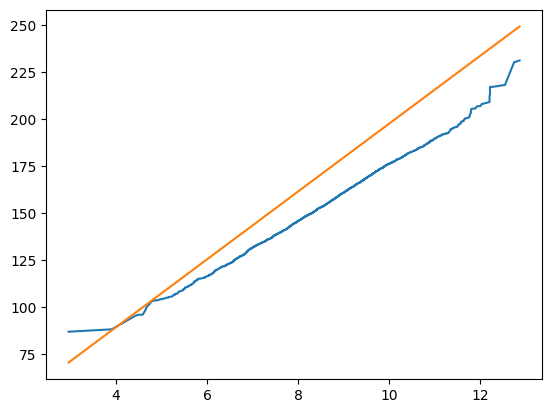

In [35]:
n = 500
pendienteN = (n*np.sum(diametroNaranjas*pesoNaranjas) - np.sum(diametroNaranjas)*np.sum(pesoNaranjas))/(n*np.sum(diametroNaranjas**2)-np.sum(diametroNaranjas)**2)
yn1 = diametroNaranjas*pendienteN+17

plt.plot(diametroNaranjas, pesoNaranjas)
plt.plot(diametroNaranjas, yn1)

In [ ]:
print(pendienteN)

18.03926853759208


In [36]:
# calculando b
b = (np.sum(pesoNaranjas)-pendienteN*np.sum(diametroNaranjas))/n
b

-0.6749023741520941

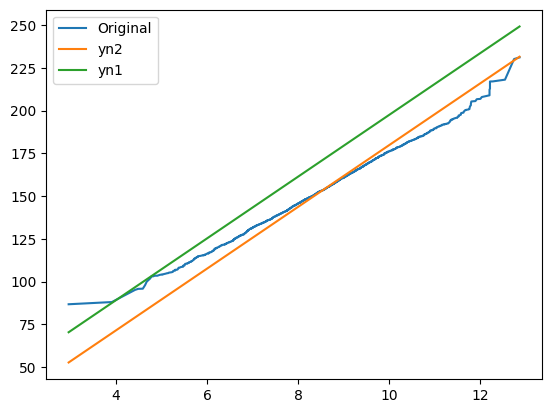

In [37]:
# y nos quedaría
yn2 = diametroNaranjas*pendienteN+b

plt.plot(diametroNaranjas, pesoNaranjas)
plt.plot(diametroNaranjas, yn2)
plt.plot(diametroNaranjas, yn1)
plt.legend(['Original', 'yn2', 'yn1'])

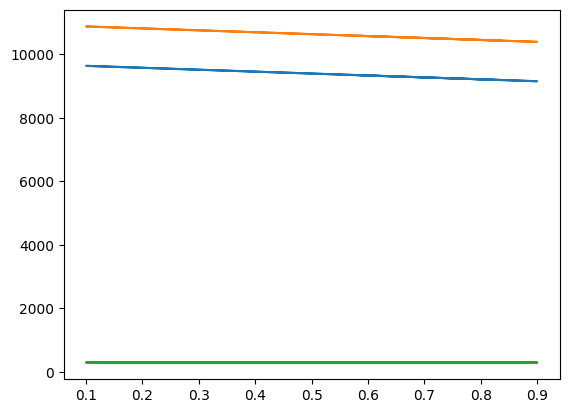

In [39]:
np.random.seed(77)

pendientes = np.random.uniform(.1,.9,5000)
normaNaranjas1 = np.array([])
normaNaranjas2 = np.array([])
normaNaranjas3 = np.array([])

for i in range(5000):
    # Calcula la norma (o distancia) entre los valores reales pesoNaranjas y las rectas obtenidas con los valores de b, uno de 17 y el otro obtenido por nosotros
    normaNaranjas1 = np.append(normaNaranjas1, np.linalg.norm(pesoNaranjas - (pendientes[i]*diametroNaranjas + 17)))
    normaNaranjas2 = np.append(normaNaranjas2, np.linalg.norm(pesoNaranjas - (pendientes[i]*diametroNaranjas + b)))
    normaNaranjas3 = np.append(normaNaranjas3, np.linalg.norm(pesoNaranjas - (pendienteN*diametroNaranjas + b)))

plt.plot(pendientes, normaNaranjas1)
plt.plot(pendientes, normaNaranjas2)
plt.plot(pendientes, normaNaranjas3)


A mí entender la recta que más se ajusta ya que la normalización que refleja la diferencia entre la gráfica original y la de las rectas obtenidas, es aquella en la que calculamos a y b como:

$$\alpha = pendiente$$
$$\beta = interseccion$$
$$n = observaciones$$
$$y = precio$$
$$x = fecha$$


La solución para la pendiente es:

$$\alpha = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2} $$

Y para la intersección:
 $$\beta = \frac{\sum y - \alpha \sum x}{n} $$

Y obtenemos la ecuación de la recta:

$$y = \alpha x + \beta $$

Pero como sigo con dudas, y no termino de comprender bien, vamos a seguir probando.

Según lo que encontré...

'La pendiente puede calcularse multiplicando la correlación r por el cociente de la desviación típica de y sobre la desviación típica de x. Esto tiene un sentido intuitivo, porque en esencia estamos volviendo a convertir el coeficiente de correlación en unidades de las variables originales. En la ecuación siguiente,  a se refiere a la pendiente y sy y sx se refieren a la desviación típica de y y a la desviación típica de x, respectivamente.'

$$\alpha = pendiente$$
$$sy = desviación típica de y$$
$$sx = desviación típica de x$$

$$\alpha = r * \frac{sy}{sx} $$

El intercepto de la recta de mejor ajuste de la regresión lineal simple puede calcularse después de calcular la pendiente. Para ello, restamos el producto de la pendiente y la media de x de la media de y. En la ecuación siguiente i se refiere a la intersección y y la línea recta sobre la intersección x y y es una forma de referirse a la media de x y y respectivamente; nos referimos a estos términos como barra x y barra y.

$$i = intercepto$$
$$my = media de y$$
$$mx = media de x$$

$$i = my - r * \frac{sy}{sx} *mx$$


 También podríamos escribir sy y sx en términos de la desviación típica, y también podríamos escribir la ecuación de forma más larga para la correlación r. A continuación, podríamos multiplicar en cruz y simplificar la ecuación eliminando los términos comunes y acabar con el siguiente conjunto de ecuaciones para la pendiente y el intercepto. No se trata tanto de mostrar cómo una ecuación se convierte en la otra como de subrayar que ambas ecuaciones son la misma, ya que puedes ver una u otra. 

La solución para la pendiente es:

$$\alpha = \frac{ \sum (x - mx) (y-my)}{\sum (x-mx)^2} $$

Y para la intersección:
 $$\beta = my - \frac{\sum (x-mx)(y-my)}{\sum(x-mx)^2} * mx $$



In [50]:
# aplicando
pendienteN = np.sum((diametroNaranjas-np.mean(diametroNaranjas))*(pesoNaranjas-np.mean(pesoNaranjas)))/(np.sum((diametroNaranjas-np.mean(diametroNaranjas))**2))

interseccionN = np.mean(pesoNaranjas)-pendienteN*np.mean(diametroNaranjas)

In [83]:
interseccionN

27.385603812182524

In [53]:
yn3

array([ 71.1928497 ,  85.25260767,  92.80047774, ..., 213.12240647,
       216.08235552, 217.85832495])

In [59]:
pendienteN

14.79974523198479

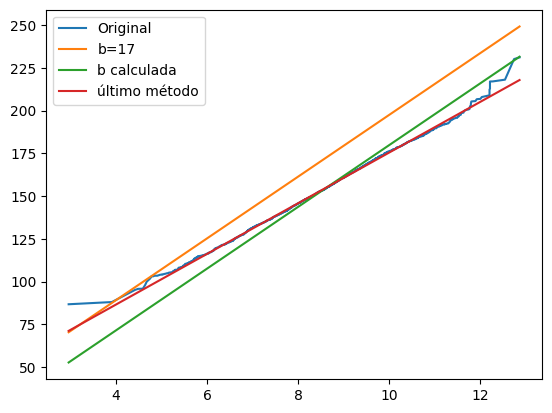

In [54]:
yn3 = pendienteN*diametroNaranjas+interseccionN
plt.plot(diametroNaranjas, pesoNaranjas)
plt.plot(diametroNaranjas, yn1)
plt.plot(diametroNaranjas, yn2)

plt.plot(diametroNaranjas, yn3)
plt.legend(['Original', 'b=17', 'b calculada', 'último método'])

In [66]:
(pesoNaranjas[np.argmax(pesoNaranjas)]-pesoNaranjas[np.argmin(pesoNaranjas)])
(diametroNaranjas[np.argmax(diametroNaranjas)]-diametroNaranjas[diametroNaranjas])

IndexError: arrays used as indices must be of integer (or boolean) type

In [71]:
p = ((pesoNaranjas[np.argmax(pesoNaranjas)]-pesoNaranjas[np.argmin(pesoNaranjas)])/(diametroNaranjas[np.argmax(diametroNaranjas)]-diametroNaranjas[np.argmin(diametroNaranjas)]))*(pendientes[np.argmin(normaNaranjas1)])

In [86]:
yyy = 14*diametroNaranjas +27

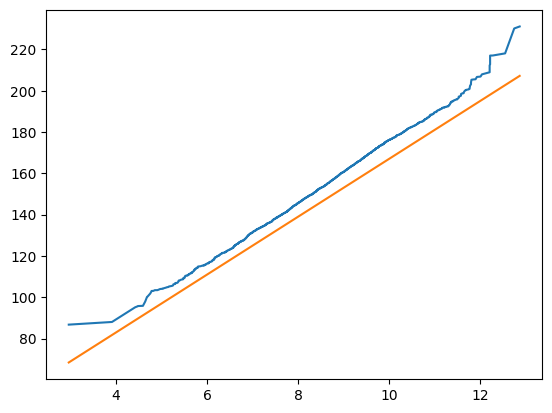

In [87]:
plt.plot(diametroNaranjas,pesoNaranjas)
plt.plot(diametroNaranjas, yyy)